In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [44]:
def plot_acf_pacf(y, model_name):
    fig, ax = plt.subplots(1,2, figsize = (8, 4.5))
    plt.suptitle('Эмпирические АКФ и ЧАКФ для модели %s' %model_name)
    sm.graphics.tsa.plot_acf(y, ax = ax[0])
    ax[0].set_xlabel('Лаг')
    ax[0].set_ylabel('Автокорреляция')
    sm.graphics.tsa.plot_pacf(y, ax = ax[1])
    ax[1].set_xlabel('Лаг')
    ax[1].set_ylabel('Частичная автокорреляция')
    plt.tight_layout()
    plt.show()
    
def get_acf_pacf_table(y):
    y_acf = sm.tsa.stattools.acf(y,nlags = 10, alpha = 0.05)
    y_pacf = sm.tsa.stattools.pacf(y, nlags = 10, alpha = 0.05)
    acf_table = pd.DataFrame(data = np.round(y_acf[0],3))
    acf_table.columns = ['АКФ']
    acf_table['Нижняя граница ДИ для АКФ'] = np.round(y_acf[1][:,0],3)
    acf_table['Верхняя граница ДИ для АКФ'] = np.round(y_acf[1][:,1],3)
    acf_table['ЧАКФ'] = np.round(y_pacf[0],3)
    acf_table['Нижняя граница ДИ для ЧАКФ'] = np.round(y_pacf[1][:,0],3)
    acf_table['Верхняя граница ДИ для ЧАКФ'] = np.round(y_pacf[1][:,1],3)
    return acf_table

In [12]:
gdppc = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_gdp.csv', index_col = 0)
gdppc.index = pd.to_datetime(gdppc.index)
gdppc.index.freq = 'QS-OCT'
gdppc = gdppc['RGDPRU']
gdppc.head()

Date
2011-01-01    26470
2011-04-01    28625
2011-07-01    30177
2011-10-01    32312
2012-01-01    27980
Freq: QS-OCT, Name: RGDPRU, dtype: int64

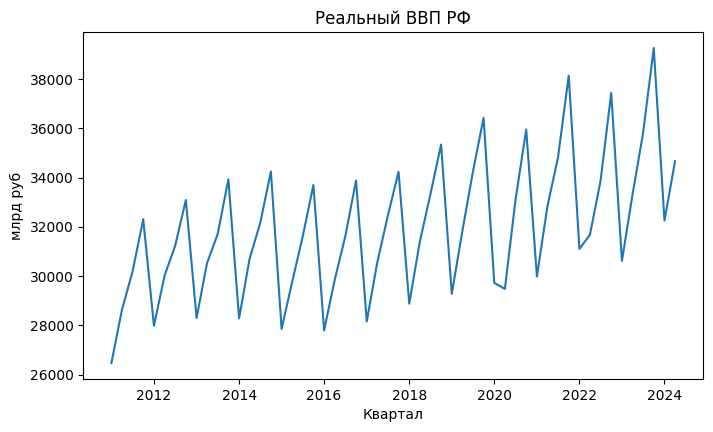

In [41]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(gdppc)
plt.xlabel('Квартал')
plt.ylabel('млрд руб')
plt.title('Реальный ВВП РФ')
plt.show()

In [42]:
Y = gdppc.values
X = np.arange(1, len(gdppc)+1)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     21.44
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           2.48e-05
Time:                        01:40:17   Log-Likelihood:                -496.14
No. Observations:                  54   AIC:                             996.3
Df Residuals:                      52   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.928e+04    665.301     44.011      0.0

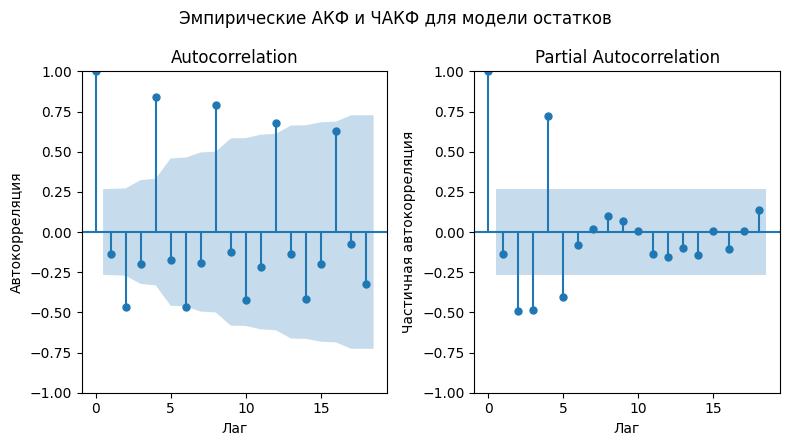

,АКФ,Нижняя граница ДИ для АКФ,Верхняя граница ДИ для АКФ,ЧАКФ,Нижняя граница ДИ для ЧАКФ,Верхняя граница ДИ для ЧАКФ
0,1.000,1.000,1.000,1.000,1.000,1.000
1,-0.136,-0.403,0.130,-0.139,-0.406,0.128
2,-0.464,-0.736,-0.193,-0.511,-0.778,-0.245
3,-0.199,-0.522,0.125,-0.528,-0.795,-0.261
4,0.839,0.507,1.170,0.826,0.559,1.093
5,-0.177,-0.635,0.282,-0.763,-1.029,-0.496
6,-0.465,-0.928,-0.001,0.167,-0.100,0.434
7,-0.194,-0.689,0.302,0.417,0.150,0.683
8,0.790,0.290,1.291,0.100,-0.166,0.367
9,-0.126,-0.708,0.457,-0.394,-0.660,-0.127


In [45]:
plot_acf_pacf(results.resid, 'остатков')
get_acf_pacf_table(results.resid)

In [73]:
results_resid = sm.tsa.arima.ARIMA(results.resid, order = (1,0,0), seasonal_order=(2, 0, 0, 4)).fit()
print(results_resid.summary())

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                    SARIMAX Results                                    
Dep. Variable:                               y   No. Observations:                   54
Model:             ARIMA(1, 0, 0)x(2, 0, 0, 4)   Log Likelihood                -433.156
Date:                         Sun, 01 Dec 2024   AIC                            876.311
Time:                                 01:53:39   BIC                            886.256
Sample:                                      0   HQIC                           880.147
                                          - 54                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6971   5850.436      0.001      0.999   -1.15e+04    1.15e+04
ar.L1          0.6158      0.168      3.663      0.000     

In [72]:
sm.stats.acorr_ljungbox(results_resid.resid, lags = 10, boxpierce= True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,1.931076,0.164641,1.827626,0.176408
2,2.023877,0.363514,1.913798,0.384082
3,4.528676,0.209747,4.194954,0.241168
4,4.551250,0.336514,4.215109,0.377676
5,4.552434,0.472899,4.216145,0.518735
6,4.553542,0.602208,4.217096,0.647324
7,4.746662,0.690847,4.379178,0.735213
8,4.797189,0.779017,4.420682,0.817315
9,4.916039,0.841565,4.516187,0.874283
10,4.982974,0.892312,4.568778,0.918064


In [38]:
Y = gdppc.values
X = np.array((np.arange(1, len(gdppc)+1), np.arange(1, len(gdppc)+1)**2)).T
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     10.66
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           0.000136
Time:                        01:31:35   Log-Likelihood:                -496.03
No. Observations:                  54   AIC:                             998.1
Df Residuals:                      51   BIC:                             1004.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.964e+04   1029.598     28.785      0.0

In [40]:
Y = np.log(gdppc.values)
X = np.arange(1, len(gdppc)+1)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     21.39
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           2.52e-05
Time:                        01:32:31   Log-Likelihood:                 64.431
No. Observations:                  54   AIC:                            -124.9
Df Residuals:                      52   BIC:                            -120.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2854      0.021    498.377      0.0